In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from scipy.stats import ttest_ind
from pylab import rcParams
%matplotlib inline

from pulp import *
from tabulate import tabulate
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt # matplotlib
import os
import plotly.figure_factory as ff

mcd = pd.read_csv('menu.csv')

In [2]:
#SEE IF NaN VALUES EXISTS
print(mcd.isna().any())
#DATA
print(mcd.info())
print(mcd.head())
print(mcd.dtypes)
print(mcd.describe())

Category                         False
Item                             False
Serving Size                     False
Calories                         False
Calories from Fat                False
Total Fat                        False
Total Fat (% Daily Value)        False
Saturated Fat                    False
Saturated Fat (% Daily Value)    False
Trans Fat                        False
Cholesterol                      False
Cholesterol (% Daily Value)      False
Sodium                           False
Sodium (% Daily Value)           False
Carbohydrates                    False
Carbohydrates (% Daily Value)    False
Dietary Fiber                    False
Dietary Fiber (% Daily Value)    False
Sugars                           False
Protein                          False
Vitamin A (% Daily Value)        False
Vitamin C (% Daily Value)        False
Calcium (% Daily Value)          False
Iron (% Daily Value)             False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26

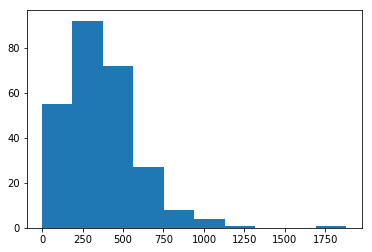

Summary Calories:
count     260.000000
mean      368.269231
std       240.269886
min         0.000000
25%       210.000000
50%       340.000000
75%       500.000000
max      1880.000000
Name: Calories, dtype: float64


In [3]:
# plot histogram dari kolom Calories
plt.hist(mcd.Calories)
plt.show()
print('Summary Calories:\n{}'.format(mcd['Calories'].describe()))

In [6]:
# menentukan menu dengan kalori tertinggi
kaloriTertinggi = mcd.query('Calories >= 1880')
print(kaloriTertinggi['Item'].head())

82    Chicken McNuggets (40 piece)
Name: Item, dtype: object


In [7]:
# menentukan menu dengan kalori terendah
kaloriTerendah = mcd.query('Calories <= 0')
print(kaloriTerendah['Item'].head())

114         Diet Coke (Small)
115        Diet Coke (Medium)
116         Diet Coke (Large)
117         Diet Coke (Child)
122    Diet Dr Pepper (Small)
Name: Item, dtype: object


In [6]:
# mengelompokan kalori berdasarkan kategori
kalori = mcd.drop('Item', axis = 1)
kalori = mcd.groupby(['Category'])['Calories'].mean()
print(kalori)
kategori = ['Chicken & Fish','Smoothies & Shakes','Breakfast','Beef & Pork',
            'Coffee & Tea','Salads','Snacks & Sides','Desserts','Beverages']

Category
Beef & Pork           494.000000
Beverages             113.703704
Breakfast             526.666667
Chicken & Fish        552.962963
Coffee & Tea          283.894737
Desserts              222.142857
Salads                270.000000
Smoothies & Shakes    531.428571
Snacks & Sides        245.769231
Name: Calories, dtype: float64


In [7]:
labels=[]
for i in mcd['Category']:
    if i=='Beef & Pork' or i=='Breakfast' or i=='Chicken & Fish':
        labels.append('Meals')
    elif i=='Beverages' or i=='Coffee & Tea' or i=='Smoothies & Shakes':
        labels.append('Beverages')
    else:
        labels.append('Other')
mcd['Menu']=labels
mcd

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Menu
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,10,4,17,3,17,10,0,25,15,Meals
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,10,4,17,3,18,6,0,25,8,Meals
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,10,4,17,2,14,8,0,25,10,Meals
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,10,4,17,2,21,15,0,30,15,Meals
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,10,4,17,2,21,6,0,25,10,Meals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,27,1,4,64,12,15,0,40,8,Beverages
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,35,1,5,85,15,20,0,50,10,Beverages
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,18,1,2,43,8,10,0,25,6,Beverages
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,38,2,9,103,21,20,0,60,6,Beverages


In [8]:
mcd.groupby('Menu')['Calories'].mean()

Menu
Beverages    299.466667
Meals        529.285714
Other        245.000000
Name: Calories, dtype: float64

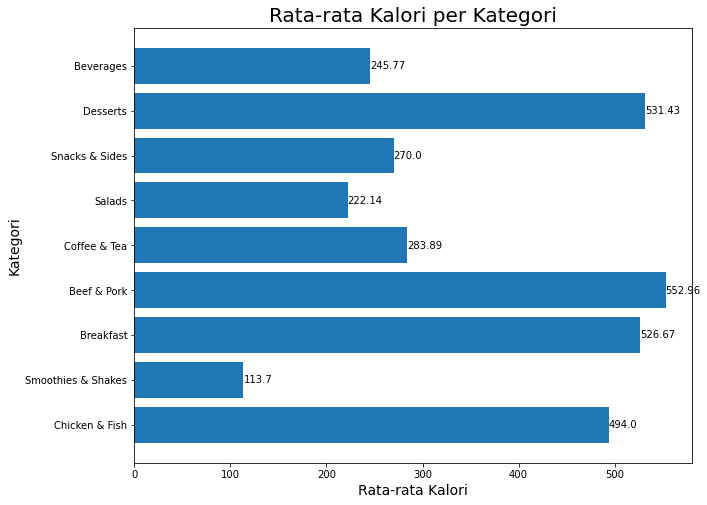

In [9]:
# penyelesaian pertanyaan A
plt.figure(figsize=(10,8))
plt.title('Rata-rata Kalori per Kategori', fontsize = 20)
plt.ylabel('Kategori', fontsize = 14)
# plt.yticks([],[])
plt.xlabel('Rata-rata Kalori', fontsize = 14)
plt.barh(kategori, kalori)
for index, value in enumerate(kalori): 
    plt.text(value, index, str(round(value,2)), va='center')
plt.show()

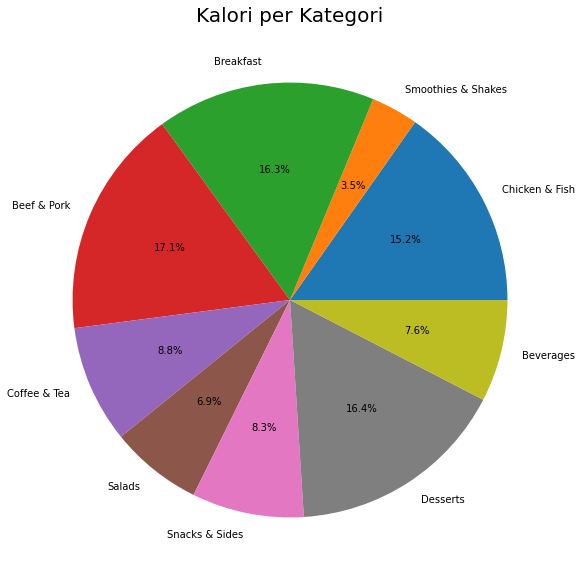

In [10]:
# penyelesaian pertanyaan B
plt.figure(figsize = (15,10))
plt.title('Kalori per Kategori', fontsize=20)
plt.pie(kalori, labels=kategori, autopct='%.1f%%')
plt.show()

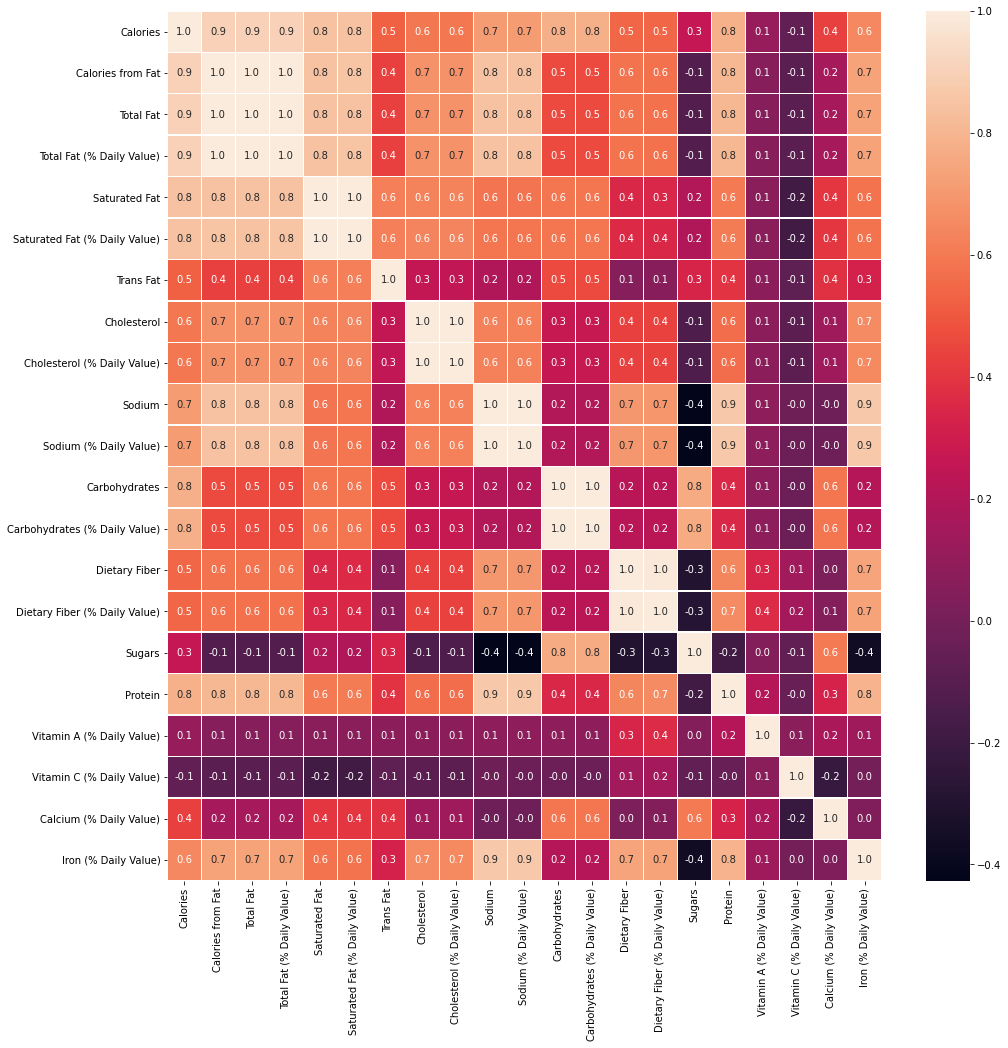

In [11]:
#CORRELATION OF DATA. HEAT MAP INCLUDED
#print(mcd.corr())
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(mcd.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [12]:
#CATEGORY BREAKDOWN
print(mcd['Category'].value_counts())

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64


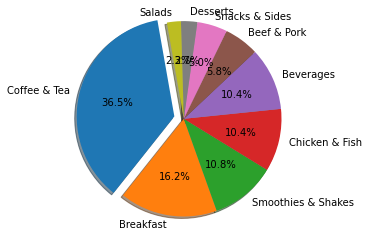

In [13]:
#PIE CHART OF CATEGORIES
labels = 'Coffee & Tea', 'Breakfast', 'Smoothies & Shakes', 'Chicken & Fish', 'Beverages','Beef & Pork', 'Snacks & Sides', 'Desserts', 'Salads'
sizes = list((mcd['Category'].value_counts()))
explode = (0.1, 0, 0,0,0,0,0,0,0 )

fig1 , ax1 = plt.subplots()

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 100)
ax1.axis ('equal')
plt.show()

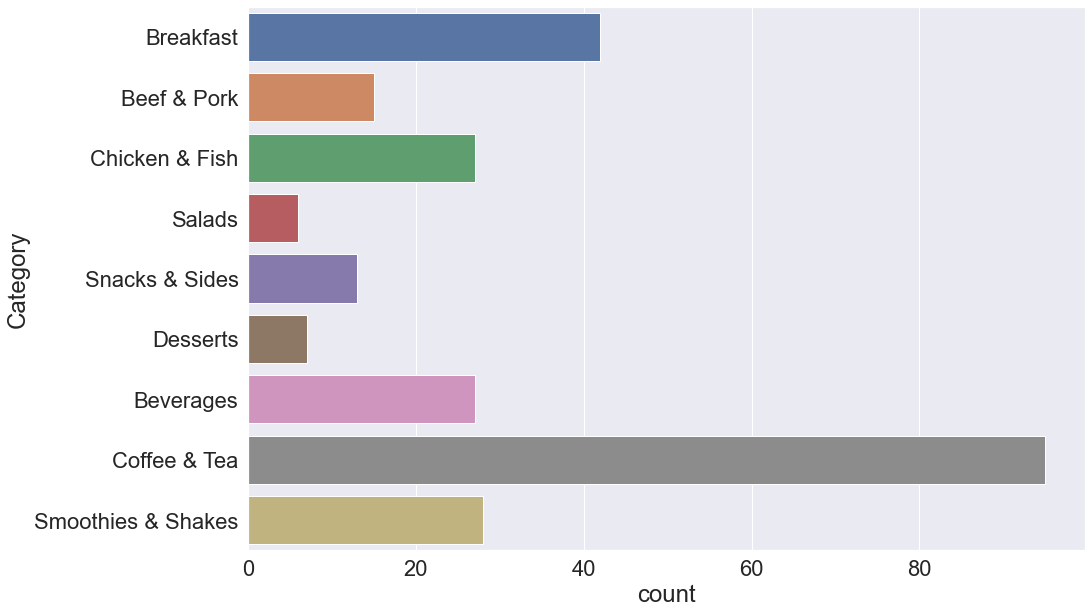

In [14]:
#SIDE BAR GRAPH OF CATEGORIES
sns.set(font_scale=2)
plt.figure(figsize=(15, 10))
sns.countplot(y='Category', data=mcd)

In [15]:
#new dataframe
sgc = mcd[(mcd['Item'].str.contains("Sandwich"))&(mcd['Item'].str.contains("Grilled"))&(mcd['Item'].str.contains("Chicken"))]
scc = mcd[(mcd['Item'].str.contains("Sandwich"))&(mcd['Item'].str.contains("Crispy"))&(mcd['Item'].str.contains("Chicken"))]
sgc = sgc.reset_index(drop=True)
scc = scc.reset_index(drop=True)
scc.drop([4], inplace=True)

mcds = sgc.merge(scc, left_index=True, right_index=True)


In [16]:
mcd.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)', 'Menu'],
      dtype='object')

In [17]:
listdrop = ['Category_x', 'Category_y', 'Serving Size_x', 'Serving Size_y', 'Total Fat (% Daily Value)_x', 
          'Total Fat (% Daily Value)_y', 'Saturated Fat (% Daily Value)_x', 'Saturated Fat (% Daily Value)_y', 
          'Cholesterol (% Daily Value)_x', 'Cholesterol (% Daily Value)_y','Sodium (% Daily Value)_x', 
          'Sodium (% Daily Value)_y','Carbohydrates (% Daily Value)_x', 'Carbohydrates (% Daily Value)_y', 
          'Dietary Fiber (% Daily Value)_x', 'Dietary Fiber (% Daily Value)_y', 'Menu_x','Menu_y']
mcds.drop(listdrop, axis=1, inplace=True)
mcds.columns = ['Items Grilled', 'Calories Grilled', 'Calories from Fat-Grilled', 'Total Fat-Grilled', 
              'Saturated Fat-Grilled', 'Trans Fat-Grilled', 'Cholesterol-Grilled', 'Sodium-Grilled',
              'Carbohydrates-Grilled', 'Dietary Fiber-Grilled', 'Sugar-Grilled', 'Protein-Grilled', 
              'Vitamin A-Grilled','Vitamin C-Grilled', 'Calcium-Grilled', 'Iron-Grilled', 'Items Crispy', 
              'Calories Crispy', 'Calories from Fat-Crispy', 'Total Fat-Crispy', 'Saturated Fat-Crispy', 
              'Trans Fat-Crispy', 'Cholesterol-Crispy', 'Sodium-Crispy', 'Carbohydrates-Crispy', 
              'Dietary Fiber-Crispy', 'Sugar-Crispy', 'Protein-Crispy', 'Vitamin A-Crispy','Vitamin C-Crispy', 
              'Calcium-Crispy', 'Iron-Crispy']

mcds = mcds.drop('Items Crispy', axis=1)
mcds['Item'] = mcds['Items Grilled'].str.replace('Grilled','')
mcds = mcds.drop('Items Grilled', axis=1)
mcds.index = mcds.Item

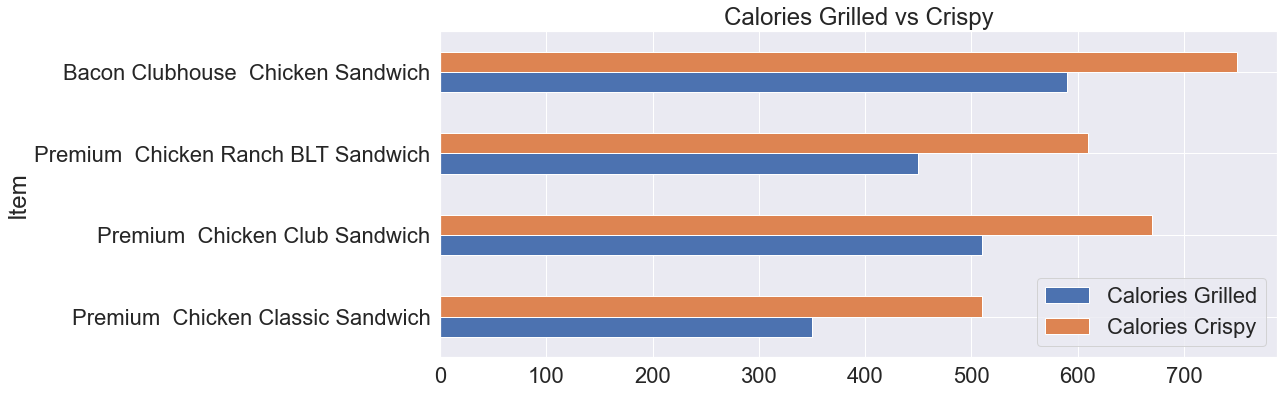

In [18]:
rcParams['figure.figsize']=15,6
mcds.loc[:,['Calories Grilled', 'Calories Crispy', 'Item']].plot(kind='barh', title="Calories Grilled vs Crispy")

In [19]:
sgc['Category'] = ['Grilled','Grilled','Grilled','Grilled']
scc['Category'] = ['Crispy','Crispy','Crispy','Crispy']
mcds = sgc.append(scc, ignore_index=True)

In [20]:
crispy = mcds[mcds['Category']=='Crispy']
grilled = mcds[mcds['Category']=='Grilled']

In [21]:
droplist = ['Category', 'Item', 'Serving Size', 'Menu']
mcds.drop(droplist, axis=1, inplace=True)

In [22]:
for i in mcds:
    a = ttest_ind(crispy[i], grilled[i])
    print('hasil uji T test variabel',i,'vs',i,':\n',a,'\n')

hasil uji T test variabel Calories vs Calories :
 Ttest_indResult(statistic=2.236796219817583, pvalue=0.0666400242500649) 

hasil uji T test variabel Calories from Fat vs Calories from Fat :
 Ttest_indResult(statistic=2.650956729194882, pvalue=0.037980028921228676) 

hasil uji T test variabel Total Fat vs Total Fat :
 Ttest_indResult(statistic=2.6840757957707293, pvalue=0.036338265077789304) 

hasil uji T test variabel Total Fat (% Daily Value) vs Total Fat (% Daily Value) :
 Ttest_indResult(statistic=2.543423420395784, pvalue=0.043877878383657434) 

hasil uji T test variabel Saturated Fat vs Saturated Fat :
 Ttest_indResult(statistic=0.8761415529968479, pvalue=0.41464886226455056) 

hasil uji T test variabel Saturated Fat (% Daily Value) vs Saturated Fat (% Daily Value) :
 Ttest_indResult(statistic=0.8430268420578854, pvalue=0.4315306160662601) 

hasil uji T test variabel Trans Fat vs Trans Fat :
 Ttest_indResult(statistic=1.0, pvalue=0.35591768374958205) 

hasil uji T test variabel C

In [23]:
#new dataframe
eggwhite = mcd[(mcd['Item'].str.contains("Egg"))&(mcd['Item'].str.contains("Whites"))|(mcd['Item'].str.contains("White"))]
egg = mcd[(mcd['Item'].str.contains("Egg"))&(~mcd['Item'].str.contains("Whites"))]
eggwhite = eggwhite.reset_index(drop=True)
egg = egg.reset_index(drop=True)
eggwhite.drop([0,9,10,11,12], axis=0, inplace=True)
egg.drop([0,1,3,8,12], axis=0, inplace=True)
mcds1 = eggwhite.merge(egg, left_index=True, right_index=True)

In [24]:
listdrop1 = ['Category_x', 'Category_y', 'Serving Size_x', 'Serving Size_y', 'Total Fat (% Daily Value)_x', 
          'Total Fat (% Daily Value)_y', 'Saturated Fat (% Daily Value)_x', 'Saturated Fat (% Daily Value)_y', 
          'Cholesterol (% Daily Value)_x', 'Cholesterol (% Daily Value)_y','Sodium (% Daily Value)_x', 
          'Sodium (% Daily Value)_y','Carbohydrates (% Daily Value)_x', 'Carbohydrates (% Daily Value)_y', 
          'Dietary Fiber (% Daily Value)_x', 'Dietary Fiber (% Daily Value)_y', 'Menu_x','Menu_y']
mcds1.drop(listdrop1, axis=1, inplace=True)
mcds1.columns = ['Items Egg White', 'Calories Egg White', 'Calories from Fat-Egg White', 'Total Fat-Egg White', 'Saturated Fat-Egg White', 'Trans Fat-Egg White', 'Cholesterol-Egg White', 'Sodium-Egg White',
                    'Carbohydrates-Egg White', 'Dietary Fiber-Egg White', 'Sugar-Egg White', 'Protein-Egg White', 'Vitamin A-Egg White','Vitamin C-Egg White', 'Calcium-Egg White',
                    'Iron-Egg White', 'Items Egg', 'Calories Egg', 'Calories from Fat-Egg', 'Total Fat-Egg', 'Saturated Fat-Egg', 'Trans Fat-Egg', 'Cholesterol-Egg', 'Sodium-Egg',
                    'Carbohydrates-Egg', 'Dietary Fiber-Egg', 'Sugar-Egg', 'Protein-Egg', 'Vitamin A-Egg','Vitamin C-Egg', 'Calcium-Egg',
                    'Iron-Egg']

mcds1 = mcds1.drop('Items Egg', axis=1)
mcds1['Item'] = mcds1['Items Egg White'].str.replace('with Egg Whites','')
mcds1 = mcds1.drop('Items Egg White', axis=1)
mcds1.index = mcds1.Item

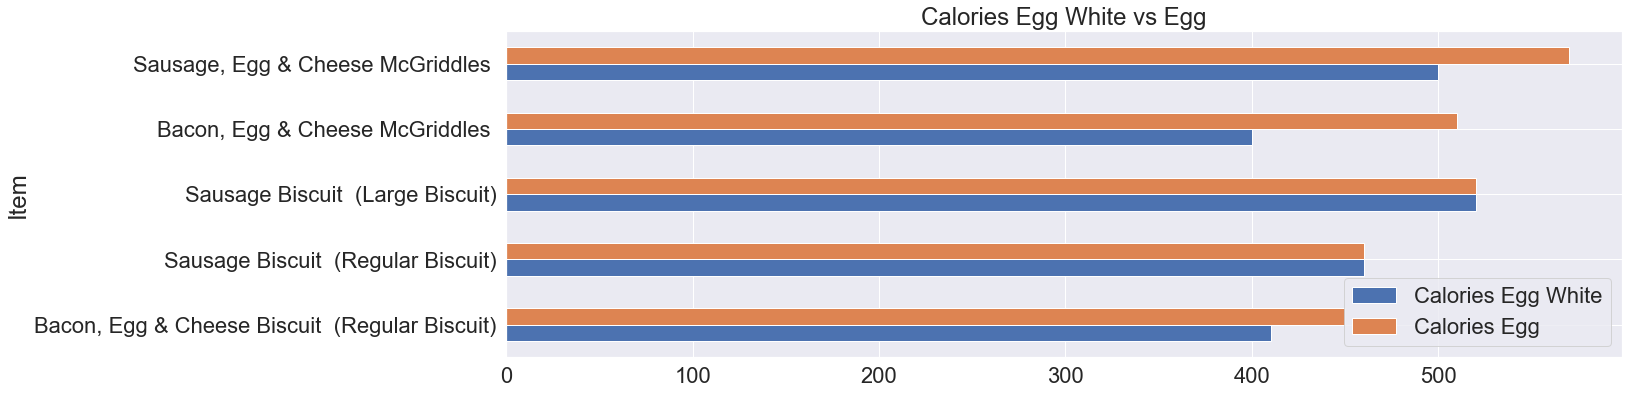

In [25]:
rcParams['figure.figsize']=20,6
mcds1.loc[:,['Calories Egg White', 'Calories Egg', 'Item']].plot(kind='barh', title="Calories Egg White vs Egg")

In [26]:
eggwhite['Category'] = ['Egg White','Egg White','Egg White','Egg White','Egg White','Egg White','Egg White','Egg White']
egg['Category'] = ['Egg','Egg','Egg','Egg','Egg','Egg','Egg','Egg']
mcds1 = eggwhite.append(egg, ignore_index=True)

In [27]:
telur = mcds1[mcds1['Category']=='Egg']
putih = mcds1[mcds1['Category']=='Egg White']

In [28]:
droplist = ['Category', 'Item', 'Serving Size','Menu']
mcds1.drop(droplist, axis=1, inplace=True)

In [29]:
for i in mcds1:
    a = ttest_ind(telur[i], putih[i])
    print('hasil uji T test variabel',i,'vs',i,':\n',a,'\n')

hasil uji T test variabel Calories vs Calories :
 Ttest_indResult(statistic=1.6764144525642164, pvalue=0.11583538198286737) 

hasil uji T test variabel Calories from Fat vs Calories from Fat :
 Ttest_indResult(statistic=2.241396185159357, pvalue=0.04172502615962556) 

hasil uji T test variabel Total Fat vs Total Fat :
 Ttest_indResult(statistic=2.242863796665653, pvalue=0.04160982408308445) 

hasil uji T test variabel Total Fat (% Daily Value) vs Total Fat (% Daily Value) :
 Ttest_indResult(statistic=2.2310251154171126, pvalue=0.042547683783385075) 

hasil uji T test variabel Saturated Fat vs Saturated Fat :
 Ttest_indResult(statistic=1.885618083164127, pvalue=0.08026921240599874) 

hasil uji T test variabel Saturated Fat (% Daily Value) vs Saturated Fat (% Daily Value) :
 Ttest_indResult(statistic=1.8146747559227665, pvalue=0.09105412814921891) 

hasil uji T test variabel Trans Fat vs Trans Fat :
 Ttest_indResult(statistic=0.0, pvalue=1.0) 

hasil uji T test variabel Cholesterol vs Ch

In [34]:
# import sys
# !{sys.executable} -m pip install Tabulate
# import sys
# !{sys.executable} -m pip install plotly


In [55]:
MenuItems = mcd.Item.tolist()
Calories = mcd.set_index('Item')['Calories'].to_dict()
TotalFat = mcd.set_index('Item')['Total Fat'].to_dict()
SaturatedFat = mcd.set_index('Item')['Saturated Fat'].to_dict()
Carbohydrates = mcd.set_index('Item')['Carbohydrates'].to_dict()
Sugars = mcd.set_index('Item')['Sugars'].to_dict()
Protein = mcd.set_index('Item')['Protein'].to_dict()
Sodium = mcd.set_index('Item')['Sodium'].to_dict()


prob = LpProblem("McOptimization Problem", LpMaximize)
MenuItems_vars = LpVariable.dicts("MenuItems",MenuItems,lowBound=0, upBound=3,cat='Integer')
prob += lpSum([Calories[i]*MenuItems_vars[i] for i in MenuItems]), "Calories"
prob += lpSum([TotalFat[i]*MenuItems_vars[i] for i in MenuItems]) <= 70, "TotalFat"
prob += lpSum([SaturatedFat[i]*MenuItems_vars[i] for i in MenuItems]) <= 20, "SaturatedFat"
prob += lpSum([Carbohydrates[i]*MenuItems_vars[i] for i in MenuItems]) <= 260, "Carbohydrates_lower"
prob += lpSum([Carbohydrates[i]*MenuItems_vars[i] for i in MenuItems]) >= 180, "Carbohydrates_upper"
prob += lpSum([Sugars[i]*MenuItems_vars[i] for i in MenuItems]) >= 17, "Sugars_lower"
prob += lpSum([Sugars[i]*MenuItems_vars[i] for i in MenuItems]) <= 90, "Sugars_upper"

prob += lpSum([Protein[i]*MenuItems_vars[i] for i in MenuItems]) >= 40, "Protein_lower"
prob += lpSum([Protein[i]*MenuItems_vars[i] for i in MenuItems]) <= 120, "Protein_upper"

prob += lpSum([Sodium[i]*MenuItems_vars[i] for i in MenuItems]) <= 6000, "Sodium"


prob.writeLP("McOptimization.lp")
prob.solve()
data_matrix = []
data_matrix.append(['Item', 'Amount','Calories','Saturated Fat','Total Fat','Carbohydrates', 'Sugar','Protein','Sodium'])

print("Status:", LpStatus[prob.status])
for v in prob.variables():
    if v.varValue > 0:
        Item = mcd.loc[mcd['Item'] == v.name.replace('MenuItems_','').replace('_',' ')]
        Item_Calories = Item['Calories'].values*v.varValue
        Item_TotalFat = Item['Total Fat'].values*v.varValue
        Item_Saturated = Item['Saturated Fat'].values*v.varValue
        Item_Carbohydrates = Item['Carbohydrates'].values*v.varValue
        Item_Sugar = Item['Sugars'].values*v.varValue
        Item_Protein = Item['Protein'].values*v.varValue
        Item_Sodium = Item['Sodium'].values*v.varValue

        data_matrix.append([v.name.replace('MenuItems_','').replace('_',' '),v.varValue,Item_Calories[0], \
                            Item_TotalFat[0],Item_Saturated[0],Item_Carbohydrates[0],Item_Protein[0],
                            Item_Sugar[0],Item_Sodium[0]/1000])

print(' ')
results = {}
print("Total Calories = ", value(prob.objective))
for constraint in prob.constraints:
    s = 0
    for var, coefficient in prob.constraints[constraint].items():
        s += var.varValue * coefficient
    results[prob.constraints[constraint].name.replace('_lower','').replace('_upper','')] = s
table = ff.create_table(data_matrix)
print(data_matrix)
iplot(table, filename='simple_table')


Status: Optimal
 
Total Calories =  2205.0
[['Item', 'Amount', 'Calories', 'Saturated Fat', 'Total Fat', 'Carbohydrates', 'Sugar', 'Protein', 'Sodium'], ['Apple Slices', 1.0, 15.0, 0.0, 0.0, 4.0, 0.0, 3.0, 0.0], ['Hash Brown', 3.0, 450.0, 27.0, 4.5, 45.0, 3.0, 0.0, 0.93], ['Honey Mustard Snack Wrap (Grilled Chicken)', 3.0, 750.0, 24.0, 10.5, 81.0, 48.0, 6.0, 1.95], ['Nonfat Latte (Medium)', 3.0, 390.0, 0.0, 0.0, 57.0, 36.0, 48.0, 0.405], ['Nonfat Latte with Sugar Free French Vanilla Syrup (Medium)', 1.0, 170.0, 0.0, 0.0, 30.0, 12.0, 16.0, 0.18], ['Southern Style Crispy Chicken Sandwich', 1.0, 430.0, 19.0, 3.0, 43.0, 21.0, 7.0, 0.91]]
